In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

In [2]:
matfile = sio.loadmat("../data/sampleEEGdata")
EEG = matfile["EEG"][0,0]


tidx1 = np.argmin(np.abs(EEG["times"]))
tidx2 = np.argmin(np.abs(EEG["times"]-800))

covmatT = np.zeros( (int(EEG["nbchan"]),int(EEG["nbchan"])) )

for triali in range(int(EEG["trials"])):
    
    tmpdat = EEG["data"][:,tidx1:tidx2,triali]
    
    for ci in range(int(EEG["nbchan"])):
        tmpdat[ci,:] -= np.mean(tmpdat[ci,:])
    covmatT += tmpdat@tmpdat.T / (tidx2-tidx1)

covmatT = covmatT/EEG["trials"]

C:\Users\kerem\AppData\Local\Temp\ipykernel_11524\1734854473.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  covmatT = np.zeros( (int(EEG["nbchan"]),int(EEG["nbchan"])) )
C:\Users\kerem\AppData\Local\Temp\ipykernel_11524\1734854473.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  for triali in range(int(EEG["trials"])):
C:\Users\kerem\AppData\Local\Temp\ipykernel_11524\1734854473.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  for ci in range(int(EEG["

In [3]:
erp = np.mean(EEG["data"][:,tidx1:tidx2,:],axis=2)

for ci in range(int(EEG["nbchan"])):
    erp[ci,:] -= np.mean(erp[ci,:])

covmatA = erp@erp.T / (tidx2-tidx1)

C:\Users\kerem\AppData\Local\Temp\ipykernel_11524\4088790610.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  for ci in range(int(EEG["nbchan"])):


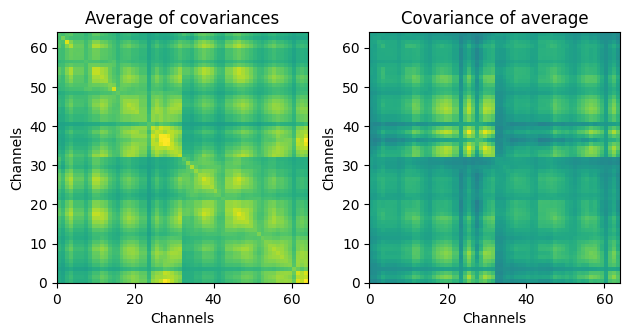

In [12]:
plt.subplot(121)
plt.pcolormesh(np.flipud(covmatT), vmin=-100, vmax=100)
plt.axis("square")
plt.xlabel("Channels")
plt.ylabel("Channels")
plt.title("Average of covariances")

plt.subplot(122)
plt.pcolormesh(np.flipud(covmatA), vmin=-10, vmax=10)
plt.axis("square")
plt.xlabel("Channels")
plt.ylabel("Channels")
plt.title("Covariance of average")

plt.tight_layout()
plt.show()
